In [12]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

val_loss, val_acc = model.evaluate(x_test, y_test)

2022-01-11 22:45:13.297345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-11 22:45:13.297360: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-11 22:45:13.297374: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alejandrorg): /proc/driver/nvidia/version does not exist
2022-01-11 22:45:13.297525: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3
1875/1875 [==============================] - 2s 757us/step - loss: 0.2683 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 1s 753us/step - loss: 0.1077 - accuracy: 0.9663
Epoch 3/3
313/313 [==============================] - 0s 502us/step - loss: 0.0927 - accuracy: 0.9712


In [14]:
import numpy as np
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)
print(np.argmax(predictions[0]))

2022-01-11 22:47:06.652220: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: epic_num_reader.model/assets
7


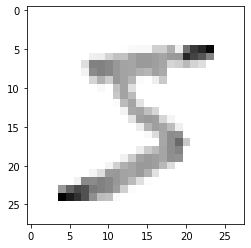

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [13]:
print(val_loss)
print(val_acc)

0.09271587431430817
0.9711999893188477
